In [30]:
import pandas as pd

In [31]:
import pandas as pd

In [32]:
dataframe=pd.read_csv('collegePlace.csv')

In [33]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [34]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [35]:
dataframe['Stream'].replace({'Electronics And Communication':0,'Computer Science':1,'Information Technology':2,'Mechanical':3,'Electrical':4,'Civil':5},inplace=True)

In [36]:
dataframe['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [37]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1


In [38]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1


In [39]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [40]:
import matplotlib.pyplot as plt

In [41]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
backlog=dataframe['HistoryOfBacklogs']
y=dataframe['PlacedOrNot']


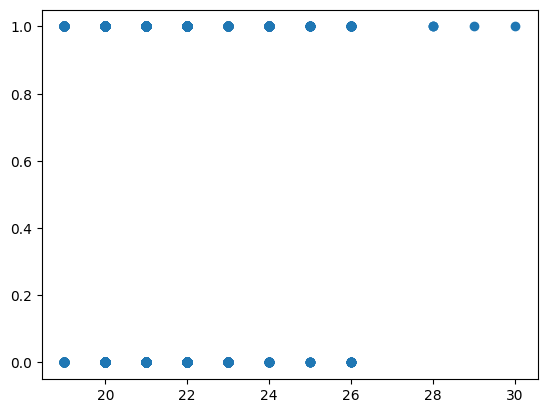

In [42]:
plt.scatter(age,y)

In [43]:
Y = dataframe["PlacedOrNot"]
X = dataframe.drop(["PlacedOrNot"],axis = 1)

In [44]:
X


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,0
3,21,0,2,0,8,0,1
4,22,0,3,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,1,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [46]:
from xgboost import XGBClassifier

In [47]:
clf = XGBClassifier(learning_rate=0.09, n_estimators=150)

In [56]:
clf.fit(X_train, Y_train,eval_metric='logloss')

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
type(stream[1])

numpy.int64

In [58]:
gender=dataframe['Gender']

In [59]:
type(stream[1])

numpy.int64

In [60]:
type(gender[1])

numpy.int64

In [62]:
predictions=clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
print("accuracy_score: " + str(accuracy_score(Y_test,predictions)))

accuracy_score: 0.8754208754208754
